# Projeto final - Programação para deep learning

## Análise de dados dos casos de dengue no Brasil

- Objetivo: realizar uma análise de dados de casos de dengue no Brasil
  
- **Integrandes da equipe**:
    - Débora Freitas
    - Douglas
    - Italo Yoshito
    - Marcos Eduardo
    - Silvandro Pedrozo

### Obtenção dos dados:

- A extração dos dados foi obtida por meio do SINAN (Sistemas de Agravo e notificação) do Ministério da Saúde;
- O SINAN coleta, processa e dissemina dados sobre doenças e agravos de notificação compulsória, bem como outros agravos de interesse local. Ele é utilizado para monitorar a ocorrência dessas condições, auxiliar na tomada de decisões em saúde pública e planejar ações de vigilância epidemiológica; 
- Os dados foram obtidos por meio do SQL via portal Base dos Dados ([acesso aqui](https://basedosdados.org/dataset/f51134c2-5ab9-4bbc-882f-f1034603147a?table=9bdbca38-d97f-47fa-b422-84477a6b68c8)).
- A plataforma gera uma consulta no BigQuery, onde foi acrescentado, também, alguns filtros para a extração dos dados, tais como:
> **WHERE** ano = 2025  
>  **ORDER BY RAND**()  
>  **LIMIT** 10000  

---

## Guia e descrição da atividade (apagar depois)

Transformações nos dados:
- Verifique a necessidade de transformar os dados (nova coluna? apagar colunas?)
- Salvar a nova base de dados;

Análise:
- Apresentação de estatísticas, gráficos e figuras relativas aos dados;
- Apresente pelo menos 2 gráficos com informações relevantes sobre a base de dados (por exemplo: Qual a proporção dos usuários em gênero masculino/feminino? Qual a série temporal de chuvas em Recife nos anos 2020 e 2022?).
- Geração de conhecimento
- Gere pelo menos 3 perguntas sobre a base de dados. Exemplos: Há mais mulheres pegando Chycungunha em Recife? A tendência para vacinação em São Paulo está crescente? Há alguma relação entre incidência de casos de Chycungunha e disposição geográfica em Recife?
- Verifique as respostas da sua pergunta. Dê prioridade para perguntas que podem ser resolvidas usando gráficos.

Avaliação:

Qualidade da Apresentação do Notebook:
- Possui explicação de cada etapa;
- O código está limpo
- Geração / uso de uma base relevante:
- Base recente
- Base que possui relevância tecnológica, social, econômica (deve ser dito no Notebook porque os autores acreditam que isso é verdade)
- Boas perguntas
- As respostas encontradas respondem perguntas com relevância? Seria possível utilizá-las no serviço público para tomar decisão? Numa empresa?

Apresentação
- Deve durar no máximo 10 minutos
- Deve ser explicado/lido o que tem no notebook

---

## Perguntas relevantes

**Gerais / de levantamento**  
1 - (Marcos) Quantos casos estamos analisando no total  
2 - (Marcos) Quantitativo da evolução do caso  
3 - (Marcos) Casos por: estado, município, sexo, raça, escolaridade, ocupação  
4 - (Marcos) Quantos tipos de exames foram realizados   
5 - (Marcos) Quantitativo de casos graves  
6 - (Italo) Quantitativo da classificação final do diagnóstico  
7 - (Italo) Quantitativo da evolução do caso  
8 - (Italo) Quantidade de casos com manifestações graves (hemorrágicos)  
9 - (Italo) Total de caso por ano (se for utilizar a amostra que tem mais anos)  

**Análises relevantes**  
10 - (Douglas) Top 5 estados com maior destaque e top 5 estados com menor destaque  
11 - (Douglas) Quais os top 3 municípios de maior destaque por estado  
12 - (Débora) Quantidade e percentual de casos confirmados por PCR (e quais as cidades com destaque para este tipo de exame geralmente encontramos para cidades mais ricas e com infraestrutura e laboratórios)  
13 - (Débora) Quantidade e percentual de casos graves e óbitos por tipo de exame diagnóstico (PCR, NS1, sorotipo, histopatologia, imunohistoquímica)  
14 - (Italo) Quantos casos graves eram de gestantes  
15 - (Silvandro) Classificação final e evolução do diagnóstico por raça  
16 - (Silvandro) Classificação final e evolução do diagnóstico por sexo  
17 - (Silvandro) Classificação final e evolução do diagnóstico por escolaridade e ocupação  
18 - (Silvandro) Idade média, faixa etária mais afetada e menos afetada  
19 - (Silvandro) Diagnóstico final: quantos % clínico e quantos % laboratorial  
20 - (Douglas) Conflito dos exames e o diagnóstico final  
21 - (Douglas) Óbitos por UF  

# Bibliotecas utilizadas

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import matplotlib.pyplot as plt
import seaborn as sns

# Inspeçao dos dados

In [2]:
df_3 = pd.read_csv('dados-projeto/dengue_2024.csv',low_memory=False)

In [3]:
df_3.shape

(9259, 159)

In [4]:
df_3.head()

,ano,tipo_notificacao,id_agravo,data_notificacao,semana_notificacao,sigla_uf_notificacao,sigla_uf_notificacao_nome,id_regional_saude_notificacao,id_municipio_notificacao,id_municipio_notificacao_nome,id_estabelecimento,data_primeiros_sintomas,semana_sintomas,pais_residencia,sigla_uf_residencia,sigla_uf_residencia_nome,id_regional_saude_residencia,id_municipio_residencia,id_municipio_residencia_nome,ano_nascimento_paciente,data_nascimento_paciente,idade_paciente,sexo_paciente,raca_cor_paciente,escolaridade_paciente,ocupacao_paciente,ocupacao_paciente_descricao,ocupacao_paciente_descricao_familia,ocupacao_paciente_descricao_subgrupo,ocupacao_paciente_descricao_subgrupo_principal,ocupacao_paciente_descricao_grande_grupo,gestante_paciente,possui_doenca_autoimune,possui_diabetes,possui_doencas_hematologicas,possui_hepatopatias,possui_doenca_renal,possui_hipertensao,possui_doenca_acido_peptica,paciente_vacinado,data_vacina,data_investigacao,apresenta_febre,data_febre,duracao_febre,apresenta_cefaleia,apresenta_exantema,apresenta_dor_costas,apresenta_prostacao,apresenta_mialgia,apresenta_vomito,apresenta_nausea,apresenta_diarreia,apresenta_conjutivite,apresenta_dor_retroorbital,apresenta_artralgia,apresenta_artrite,apresenta_leucopenia,apresenta_epistaxe,apresenta_petequias,apresenta_gengivorragia,apresenta_metrorragia,apresenta_hematuria,apresenta_sangramento,apresenta_complicacao,apresenta_ascite,apresenta_pleurite,apresenta_pericardite,apresenta_dor_abdominal,apresenta_hepatomegalia,apresenta_miocardite,apresenta_hipotensao,apresenta_choque,apresenta_insuficiencia_orgao,apresenta_sintoma_outro,apresenta_qual_sintoma,prova_laco,internacao,data_internacao,sigla_uf_internacao,sigla_uf_internacao_nome,id_municipio_internacao,id_municipio_internacao_nome,alarme_hipotensao,alarme_plaqueta,alarme_vomito,alarme_sangramento,alarme_hematocrito,alarme_dor_abdominal,alarme_letargia,alarme_hepatomegalia,alarme_liquidos,data_alarme,grave_pulso,grave_convulsao,grave_enchimento_capilar,grave_insuficiencia_respiratoria,grave_taquicardia,grave_extremidade_fria,grave_hipotensao,grave_hematemese,grave_melena,grave_metrorragia,grave_sangramento,grave_ast_alt,grave_miocardite,grave_consciencia,grave_orgaos,data_hematocrito,hematocrito_maior,data_plaquetas,plaqueta_maior,data_hematocrito_2,hematocrito_menor,data_plaquetas_2,plaqueta_menor,data_sorologia1_chikungunya,data_resultado_sorologia1_chikungunya,resultado_sorologia1_chikungunya,sorologia1_igm,sorologia1_igg,sorologia1_tit1,resultado_sorologia2_chikungunya,sorologia2_igm,sorologia2_igg,sorologia2_tit1,resultado_prnt,data_ns1,resultado_ns1,data_viral,resultado_viral,data_pcr,resultado_pcr,amostra_pcr,amostra_outra,tecnica,resultado_amostra_outra,data_sorologia_dengue,resultado_sorologia_dengue,sorotipo,histopatologia,imunohistoquimica,manifestacao_hemorragica,classificacao_final,criterio_confirmacao,caso_fhd,caso_autoctone,pais_infeccao,sigla_uf_infeccao,sigla_uf_infeccao_nome,id_municipio_infeccao,id_municipio_infeccao_nome,doenca_trabalho,apresentacao_clinica,evolucao_caso,data_obito,data_encerramento,tipo_sistema,data_digitacao
0,2024,Individual,A90,2024-02-04,2024-06,SP,São Paulo,1341.0,3550100,São Manuel,2080443.0,2024-02-01,2024-05,1,SP,São Paulo,1341.0,3550100.0,São Manuel,1970.0,NaN,4-053,Feminino,Branca,1ª a 4ª série incompleta do EF,NaN,NaN,NaN,NaN,NaN,NaN,Não,Não,Não,Não,Não,Não,Não,Não,NaN,NaN,2024-02-04,2.0,NaN,NaN,Sim,Não,Não,NaN,Sim,Não,NaN,NaN,Não,Sim,Não,Sim,Não,NaN,Não,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Não,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-02-04,Positivo,NaN,Não Realizado,NaN,Não Realizado,NaN,NaN,NaN,NaN,NaN,Não Realizado,NaN,Não Realizado,Não Realizado,NaN,Dengue,Laboratório,NaN,NaN,NaN,SP,São Paulo,3550100.0,São Manuel,NaN,NaN,Cura,NaN,2024-02-13,NaN,2024-02-13
1,2024,Individual,A

In [5]:
df_3

,ano,tipo_notificacao,id_agravo,data_notificacao,semana_notificacao,sigla_uf_notificacao,sigla_uf_notificacao_nome,id_regional_saude_notificacao,id_municipio_notificacao,id_municipio_notificacao_nome,id_estabelecimento,data_primeiros_sintomas,semana_sintomas,pais_residencia,sigla_uf_residencia,sigla_uf_residencia_nome,id_regional_saude_residencia,id_municipio_residencia,id_municipio_residencia_nome,ano_nascimento_paciente,data_nascimento_paciente,idade_paciente,sexo_paciente,raca_cor_paciente,escolaridade_paciente,ocupacao_paciente,ocupacao_paciente_descricao,ocupacao_paciente_descricao_familia,ocupacao_paciente_descricao_subgrupo,ocupacao_paciente_descricao_subgrupo_principal,ocupacao_paciente_descricao_grande_grupo,gestante_paciente,possui_doenca_autoimune,possui_diabetes,possui_doencas_hematologicas,possui_hepatopatias,possui_doenca_renal,possui_hipertensao,possui_doenca_acido_peptica,paciente_vacinado,data_vacina,data_investigacao,apresenta_febre,data_febre,duracao_febre,apresenta_cefaleia,apresenta_exantema,apresenta_dor_costas,apresenta_prostacao,apresenta_mialgia,apresenta_vomito,apresenta_nausea,apresenta_diarreia,apresenta_conjutivite,apresenta_dor_retroorbital,apresenta_artralgia,apresenta_artrite,apresenta_leucopenia,apresenta_epistaxe,apresenta_petequias,apresenta_gengivorragia,apresenta_metrorragia,apresenta_hematuria,apresenta_sangramento,apresenta_complicacao,apresenta_ascite,apresenta_pleurite,apresenta_pericardite,apresenta_dor_abdominal,apresenta_hepatomegalia,apresenta_miocardite,apresenta_hipotensao,apresenta_choque,apresenta_insuficiencia_orgao,apresenta_sintoma_outro,apresenta_qual_sintoma,prova_laco,internacao,data_internacao,sigla_uf_internacao,sigla_uf_internacao_nome,id_municipio_internacao,id_municipio_internacao_nome,alarme_hipotensao,alarme_plaqueta,alarme_vomito,alarme_sangramento,alarme_hematocrito,alarme_dor_abdominal,alarme_letargia,alarme_hepatomegalia,alarme_liquidos,data_alarme,grave_pulso,grave_convulsao,grave_enchimento_capilar,grave_insuficiencia_respiratoria,grave_taquicardia,grave_extremidade_fria,grave_hipotensao,grave_hematemese,grave_melena,grave_metrorragia,grave_sangramento,grave_ast_alt,grave_miocardite,grave_consciencia,grave_orgaos,data_hematocrito,hematocrito_maior,data_plaquetas,plaqueta_maior,data_hematocrito_2,hematocrito_menor,data_plaquetas_2,plaqueta_menor,data_sorologia1_chikungunya,data_resultado_sorologia1_chikungunya,resultado_sorologia1_chikungunya,sorologia1_igm,sorologia1_igg,sorologia1_tit1,resultado_sorologia2_chikungunya,sorologia2_igm,sorologia2_igg,sorologia2_tit1,resultado_prnt,data_ns1,resultado_ns1,data_viral,resultado_viral,data_pcr,resultado_pcr,amostra_pcr,amostra_outra,tecnica,resultado_amostra_outra,data_sorologia_dengue,resultado_sorologia_dengue,sorotipo,histopatologia,imunohistoquimica,manifestacao_hemorragica,classificacao_final,criterio_confirmacao,caso_fhd,caso_autoctone,pais_infeccao,sigla_uf_infeccao,sigla_uf_infeccao_nome,id_municipio_infeccao,id_municipio_infeccao_nome,doenca_trabalho,apresentacao_clinica,evolucao_caso,data_obito,data_encerramento,tipo_sistema,data_digitacao
0,2024,Individual,A90,2024-02-04,2024-06,SP,São Paulo,1341.0,3550100,São Manuel,2080443.0,2024-02-01,2024-05,1,SP,São Paulo,1341.0,3550100.0,São Manuel,1970.0,NaN,4-053,Feminino,Branca,1ª a 4ª série incompleta do EF,NaN,NaN,NaN,NaN,NaN,NaN,Não,Não,Não,Não,Não,Não,Não,Não,NaN,NaN,2024-02-04,2.0,NaN,NaN,Sim,Não,Não,NaN,Sim,Não,NaN,NaN,Não,Sim,Não,Sim,Não,NaN,Não,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Não,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-02-04,Positivo,NaN,Não Realizado,NaN,Não Realizado,NaN,NaN,NaN,NaN,NaN,Não Realizado,NaN,Não Realizado,Não Realizado,NaN,Dengue,Laboratório,NaN,NaN,NaN,SP,São Paulo,3550100.0,São Manuel,NaN,NaN,Cura,NaN,2024-02-13,NaN,2024-02-13
1,2024,Individual,A

In [31]:
df_3.describe()

,ano,id_regional_saude_notificacao,id_municipio_notificacao,id_estabelecimento,pais_residencia,id_regional_saude_residencia,id_municipio_residencia,ano_nascimento_paciente,apresenta_febre,id_municipio_infeccao
count,9259.0,8399.000000,9.259000e+03,9.256000e+03,9259.0,8404.000000,9.234000e+03,9209.000000,9088.000000,6.260000e+03
mean,2024.0,1459.713061,3.665963e+06,3.890160e+06,1.0,1463.774512,3.658477e+06,1986.760886,1.144146,3.696596e+06
std,0.0,341.933214,7.037453e+05,2.653634e+06,0.0,371.197860,6.997994e+05,20.182819,0.351257,6.326065e+05
min,2024.0,1331.000000,1.100080e+06,5.900000e+01,1.0,1331.000000,1.100023e+06,1922.000000,1.000000,1.100023e+06
25%,2024.0,1345.000000,3.147907e+06,2.140702e+06,1.0,1345.000000,3.148004e+06,1972.000000,1.000000,3.304187e+06
50%,2024.0,1393.000000,3.534708e+06,2.729547e+06,1.0,1393.000000,3.530805e+06,1988.000000,1.000000,3.548906e+06
75%,2024.0,1466.000000,4.111803e+06,6.320854e+06,1.0,1466.000000,4.109609e+06,2003.000000,1.000000,4.113700e+06
max,2024.0,6255.000000,5.300108e+06,9.997091e+06,1.0,6262.000000,5.300108e+06,2024.000000,2.000000,5.300108e+06


In [6]:
# df_1.drop(['id_agravo','tipo_notificacao','id_regional_saude_notificacao','id_municipio_notificacao',
#            'id_estabelecimento','pais_residencia','id_regional_saude_residencia',],axis=1)

In [7]:
df_3['ano'].unique()

array([2024])

In [8]:
df_3['evolucao_caso'].value_counts(dropna=False)

evolucao_caso
Cura                     7537
NaN                      1397
Ignorado                  316
Óbito pelo agravo           8
Óbito em investigação       1
Name: count, dtype: int64

In [9]:
df_3['classificacao_final'].value_counts(dropna=False)

classificacao_final
Dengue                         8296
NaN                             810
Dengue com sinais de alarme     138
Dengue grave                     15
Name: count, dtype: int64

In [10]:
# Colunas que possuem, > 50% dos dados ausentes

print((df_3.isna().mean() * 100)[df_3.isna().mean() * 100 > 90].to_string())

data_nascimento_paciente                 100.000000
paciente_vacinado                        100.000000
data_vacina                              100.000000
data_febre                               100.000000
duracao_febre                            100.000000
apresenta_prostacao                      100.000000
apresenta_nausea                         100.000000
apresenta_diarreia                       100.000000
apresenta_epistaxe                       100.000000
apresenta_gengivorragia                  100.000000
apresenta_metrorragia                    100.000000
apresenta_hematuria                      100.000000
apresenta_sangramento                    100.000000
apresenta_complicacao                    100.000000
apresenta_ascite                         100.000000
apresenta_pleurite                       100.000000
apresenta_pericardite                    100.000000
apresenta_dor_abdominal                  100.000000
apresenta_hepatomegalia                  100.000000
apresenta_mi

In [29]:
# Remove colunas com mais de 90% de valores ausentes
df_3 = df_3.loc[:, (df_3.isna().mean() * 100) <= 80]

In [24]:
df_3.shape

(9259, 63)

In [27]:
selected_columns = df_3.columns[df_3.isna().mean() * 100 <= 80]

# Filter the DataFrame
filtered_dataset = df_3.loc[:, selected_columns]

In [30]:
filtered_dataset.shape

(9259, 63)

In [13]:
df_3.head()

,ano,tipo_notificacao,id_agravo,data_notificacao,semana_notificacao,sigla_uf_notificacao,sigla_uf_notificacao_nome,id_regional_saude_notificacao,id_municipio_notificacao,id_municipio_notificacao_nome,id_estabelecimento,data_primeiros_sintomas,semana_sintomas,pais_residencia,sigla_uf_residencia,sigla_uf_residencia_nome,id_regional_saude_residencia,id_municipio_residencia,id_municipio_residencia_nome,ano_nascimento_paciente,idade_paciente,sexo_paciente,raca_cor_paciente,escolaridade_paciente,ocupacao_paciente,ocupacao_paciente_descricao,ocupacao_paciente_descricao_familia,ocupacao_paciente_descricao_subgrupo,ocupacao_paciente_descricao_subgrupo_principal,ocupacao_paciente_descricao_grande_grupo,gestante_paciente,possui_doenca_autoimune,possui_diabetes,possui_doencas_hematologicas,possui_hepatopatias,possui_doenca_renal,possui_hipertensao,possui_doenca_acido_peptica,data_investigacao,apresenta_febre,apresenta_cefaleia,apresenta_exantema,apresenta_dor_costas,apresenta_mialgia,apresenta_vomito,apresenta_conjutivite,apresenta_dor_retroorbital,apresenta_artralgia,apresenta_artrite,apresenta_leucopenia,apresenta_petequias,internacao,data_ns1,resultado_ns1,resultado_viral,resultado_pcr,data_sorologia_dengue,resultado_sorologia_dengue,histopatologia,imunohistoquimica,classificacao_final,criterio_confirmacao,sigla_uf_infeccao,sigla_uf_infeccao_nome,id_municipio_infeccao,id_municipio_infeccao_nome,evolucao_caso,data_encerramento,data_digitacao
0,2024,Individual,A90,2024-02-04,2024-06,SP,São Paulo,1341.0,3550100,São Manuel,2080443.0,2024-02-01,2024-05,1,SP,São Paulo,1341.0,3550100.0,São Manuel,1970.0,4-053,Feminino,Branca,1ª a 4ª série incompleta do EF,NaN,NaN,NaN,NaN,NaN,NaN,Não,Não,Não,Não,Não,Não,Não,Não,2024-02-04,2.0,Sim,Não,Não,Sim,Não,Não,Sim,Não,Sim,Não,Não,Não,2024-02-04,Positivo,Não Realizado,Não Realizado,NaN,Não Realizado,Não Realizado,Não Realizado,Dengue,Laboratório,SP,São Paulo,3550100.0,São Manuel,Cura,2024-02-13,2024-02-13
1,2024,Individual,A90,2024-03-27,2024-13,DF,Distrito Federal,NaN,5300108,Brasília,7592477.0,2024-03-25,2024-13,1,DF,Distrito Federal,NaN,5300108.0,Brasília,1990.0,4-033,Feminino,Parda,Ignorado,NaN,NaN,NaN,NaN,NaN,NaN,Não se aplica,Não,Não,Não,Não,Não,Não,Não,2024-03-27,1.0,Sim,Não,Não,Sim,Não,Não,Não,Sim,Não,Não,Não,NaN,2024-03-27,Positivo,NaN,NaN,NaN,NaN,NaN,NaN,Dengue,Laboratório,NaN,NaN,NaN,NaN,Cura,2024-03-27,2024-03-28
2,2024,Individual,A90,2024-09-10,2024-37,SP,São Paulo,1352.0,3554102,Taubaté,3126838.0,2024-09-07,2024-36,1,SP,São Paulo,1351.0,3508504.0,Caçapava,2018.0,4-006,Feminino,Branca,Não se aplica,999991,NaN,NaN,NaN,NaN,NaN,Não se aplica,Não,Não,Não,Não,Não,Não,Não,2024-09-10,1.0,Sim,Não,Não,Sim,Não,Não,Não,Não,Não,Não,Não,Não,2024-09-10,Negativo,Não Realizado,Não Realizado,NaN,Não Realizado,Não Realizado,Não Realizado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024,Individual,A90,2024-06-25,2024-26,GO,Goiás,1779.0,5208707,Goiânia,2518384.0,2024-06-20,2024-25,1,GO,Goiás,1779.0,5208707.0,Goiânia,1981.0,4-043,Masculino,Ign/Branco,Ignorado,NaN,NaN,NaN,NaN,NaN,NaN,Não se aplica,Não,Não,Não,Não,Não,Não,Não,2024-06-25,2.0,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Ignorado,2024-06-25,Positivo,NaN,NaN,2024-06-25,Não Reagente,NaN,NaN,Dengue,Laboratório,GO,Goiás,5208707.0,Goiânia,Cura,2024-06-25,2024-06-27
4,2024,Individual,A90,2024-05-27,2024-22,SP,São Paulo,1353.0,3545209,Salto,2059584.0,2024-05-14,2024-20,1,SP,São Paulo,1353.0,3545209.0,Salto,1964.0,4-060,Masculino,Branca,Ensino médio completo (antigo colegial ou 2° g...,NaN,NaN,NaN,NaN,NaN,NaN,Não se aplica,Não,Não,Não,Não,Não,Não,Não,2024-05-27,1.0,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,NaN,NaN,NaN,NaN,2024-05-22,Reagente,NaN,NaN,Dengue,Laboratório,SP,São Paulo,3545209.0,Salto,Cura,2024-05-28,2024-06-08


In [14]:
# Informativo:

| Exame                  | O que é                                                    | Quando é usado                           | Observações                                                                                 |
|------------------------|------------------------------------------------------------|-----------------------------------------|--------------------------------------------------------------------------------------------|
| Viral (isolamento viral)| Técnica que cultiva o vírus a partir de amostras de sangue | Primeiros dias de sintomas (fase aguda) | Pouco usado por ser mais caro e demorado; serve para pesquisa e confirmação laboratorial   |
| NS1                    | Teste rápido que detecta uma proteína do vírus (antígeno NS1)| Geralmente até o 5º dia de sintomas      | Muito usado em campo; rápido, mas pode ter menor sensibilidade dependendo do dia e sorotipo |
| Sorologia              | Detecta anticorpos IgM/IgG contra o vírus                   | IgM: a partir do 5º dia; IgG: indica infecção antiga | Pode gerar falso-positivo por reação cruzada com outros flavivírus (Zika, Febre Amarela)    |
| PCR (RT-PCR)           | Detecta o material genético do vírus                        | Primeiros 5 dias de sintomas             | Alta precisão, identifica o sorotipo; mais caro e requer laboratório especializado         |
| Imunohistoquímica      | Detecta antígenos virais em tecidos (pós-morte)            | Geralmente em óbitos suspeitos           | Usado para confirmar dengue em necropsias                                                  |
| Histopatológico        | Analisa alterações celulares e teciduais causadas pelo vírus| Geralmente em óbitos                     | Mais para estudo de lesões e apoio ao diagnóstico                                          |


In [15]:
# Classificação final e evolução do diagnóstico por raça

In [16]:
df_3['evolucao_caso'].value_counts(dropna=False)

evolucao_caso
Cura                     7537
NaN                      1397
Ignorado                  316
Óbito pelo agravo           8
Óbito em investigação       1
Name: count, dtype: int64

In [17]:
df_3['raca_cor_paciente'].value_counts(dropna=False)

raca_cor_paciente
Branca        3898
Parda         3197
Ign/Branco    1588
Preta          479
Amarela         84
Indigena        13
Name: count, dtype: int64

In [18]:
df_3['classificacao_final'].value_counts(dropna=False)

classificacao_final
Dengue                         8296
NaN                             810
Dengue com sinais de alarme     138
Dengue grave                     15
Name: count, dtype: int64

In [19]:
teste_1 = (
    df_3.groupby(['raca_cor_paciente', 'classificacao_final'])
    .size()
    .unstack(fill_value=0)
    .assign(total=lambda x: x.sum(axis=1))
    .sort_values('total', ascending=True)
    .drop(columns='total')
)

teste_1

classificacao_final,Dengue,Dengue com sinais de alarme,Dengue grave
raca_cor_paciente,,,
Indigena,13,0,0
Amarela,77,4,0
Preta,418,6,0
Ign/Branco,1341,28,2
Parda,2817,35,8
Branca,3630,65,5


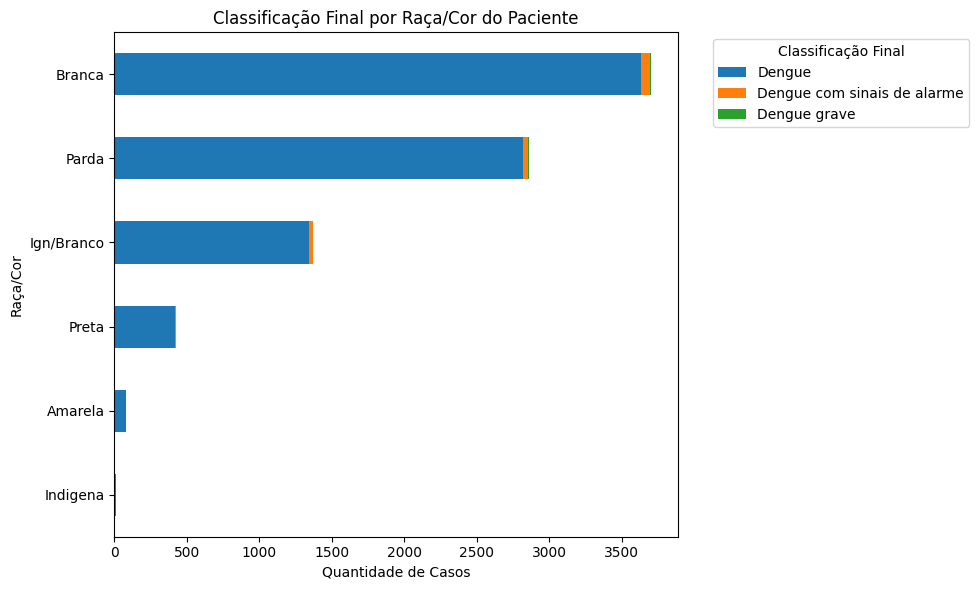

In [20]:
teste_1.plot(kind='barh', stacked=True, figsize=(10,6))
plt.title('Classificação Final por Raça/Cor do Paciente')
plt.ylabel('Raça/Cor')
plt.xlabel('Quantidade de Casos')
plt.legend(title='Classificação Final', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()